
## Diabetes

Diabetes é uma doença crônica na qual o corpo não produz insulina ou não consegue empregar adequadamente a insulina
que produz.

Mas o que é insulina? É um hormônio que controla a quantidade de glicose no sangue. O corpo precisa desse hormônio
para utilizar a glicose, que obtemos por meio dos alimentos, como fonte de energia.
Quando a pessoa tem diabetes, no entanto, o organismo não fabrica insulina e não consegue utilizar a glicose 
adequadamente. O nível de glicose no sangue fica alto -  a famosa hiperglicemia. Se esse quadro permanecer por 
longos períodos, poderá haver danos em órgãos, vasos sanguíneos e nervos.
Hoje, no Brasil, há mais de 13 milhões de pessoas vivendo com diabetes, o que representa 6,9% da população. 
E esse número está crescendo. Em alguns casos, o diagnóstico demora, favorecendo o aparecimento de complicações.


### Diabetes Tipo 1
Em algumas pessoas, o sistema imunológico ataca equivocadamente as células beta. Logo, pouca ou nenhuma insulina é 
liberada para o corpo. Como resultado, a glicose fica no sangue, em vez de ser usada como energia. Esse é o 
processo que caracteriza o Tipo 1 de diabetes, que concentra entre 5 e 10% do total de pessoas com a doença.
O Tipo 1 aparece geralmente na infância ou adolescência, mas pode ser diagnosticado em adultos também. 
Essa variedade é sempre tratada com insulina, medicamentos, planejamento alimentar e atividades físicas, 
para ajudar a controlar o nível de glicose no sangue.


### Diabetes Tipo 2
O Tipo 2 aparece quando o organismo não consegue usar adequadamente a insulina que produz; ou não produz insulina 
suficiente para controla a taxa de glicemia.
Cerca de 90% das pessoas com diabetes têm o Tipo 2. Ele se manifesta mais frequentemente em adultos, mas crianças 
também podem apresentar. Dependendo da gravidade, ele pode ser controlado com atividade física e planejamento 
alimentar. Em outros casos, exige o uso de insulina e/ou outros medicamentos para controlar a glicose



### Dados:

O dataset é original do National Institute of Diabetes and Digestive and Kidney Diseases. O objetivo do dataset é
predizer se o paciente tem ou não diabetes. 

Links:  https://www.kaggle.com/uciml/pima-indians-diabetes-database

* Pregnancies:  quantidade de gravidez               
* Glucose: glicose                    
* BloodPressure: pressão sanguinea              
* SkinThickness: espessura da pele              
* Insulin:insulina                     
* BMI: indice de massa corporal                         
* DiabetesPedigreeFunction:    
* Age: idade                          
* Outcome: variável alvo  

### Problema de Negócio

* Prever se a paciente possui ou não diabetes
* Verificar o grau de importância de cada característica
* Verificar a influência da idade na doença

In [1]:
# Carregando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score

import xgboost as xgb
from xgboost import XGBClassifier
import eli5


/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#Carregando os dados
data = pd.read_csv('diabetes.csv')

In [3]:
#Verificando as 5 primeiras linhas do dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Verificando a quantidade de linhas e colunas
data.shape

(768, 9)

In [5]:
#Verificando se há valores Nan
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Verificando os tipos de dados
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

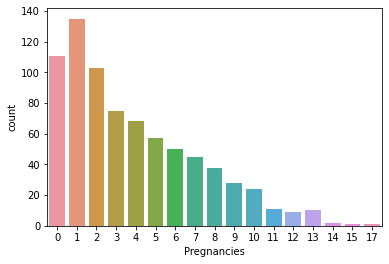

In [7]:
#Verificando os valores de gravidez
sns.countplot(x = data['Pregnancies'], data=data)

Há valores bastante alto para a quantidade de gravidez. Poderíamos verificar a veracidade (se possível) e 
a influência desses valores no projeto.

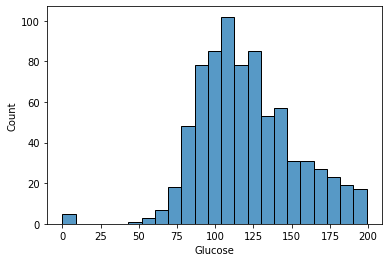

In [8]:
#Verificando os valores de glicose
sns.histplot(x = data['Glucose'], data=data)

Percebemos outliers nos dados (valores próximos ou com valor zero)

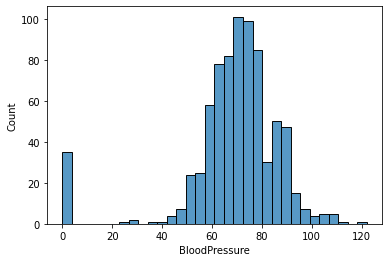

In [9]:
#Verificando os valores de pressão
sns.histplot(x = data['BloodPressure'], data=data)

Percebemos outliers nos dados (valores próximos ou com valor zero)

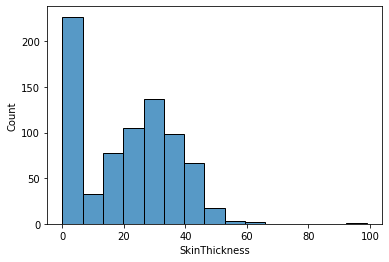

In [10]:
#Verificando os valores de espessura de pele
sns.histplot(x = data['SkinThickness'], data=data)

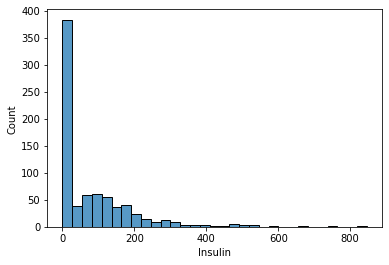

In [11]:
#Verificando os valores de Insulina
sns.histplot(x = data['Insulin'], data=data)

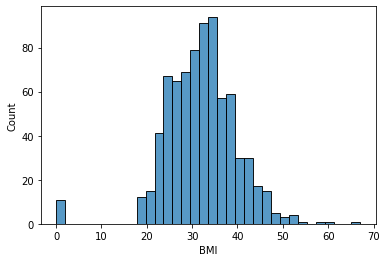

In [12]:
#Verificando os valores de BMI
sns.histplot(x = data['BMI'], data=data)

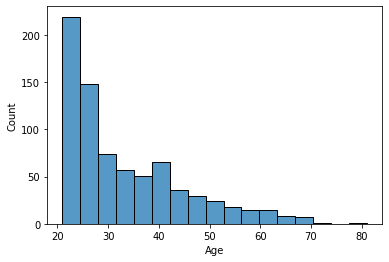

In [13]:
#Verificando os valores de Idade
sns.histplot(x = data['Age'], data=data)

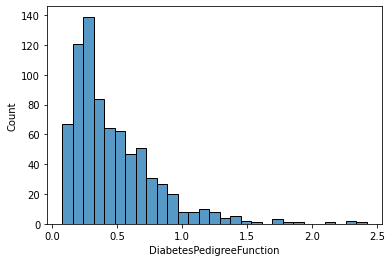

In [14]:
#Verificando os valores da função
sns.histplot(x = data['DiabetesPedigreeFunction'], data=data)

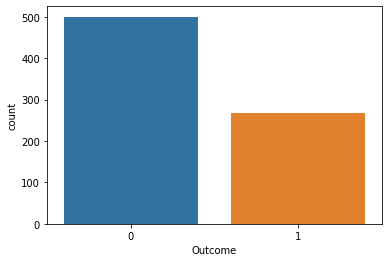

In [15]:
#Verificando o balanceamento da variável target
sns.countplot(x = data['Outcome'], data=data)

As variáveis target estão desbalanceadas. Futuramente vamos tratá-las.

In [16]:
#Verificando alguns dados estatísticos
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Como há valores zero e perderemos muitos dados se retirá-los, vamos transformar os zeros em Nan e então, imputar
a mediana nesses valores.

In [17]:
#Transformando os valores zero em NAn
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

                     

In [18]:
#Verificando a quantidade de valores a serem modificados
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
#Vamos imputar a mediana nos valores NaN.
data.fillna(data.median(), inplace=True)

In [20]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

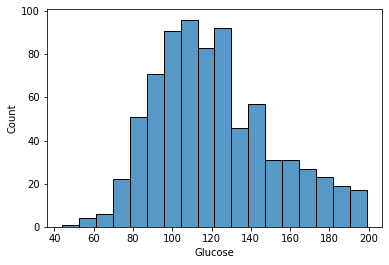

In [21]:
#Verificando os novos valores de glucose
sns.histplot(x = data['Glucose'], data=data)

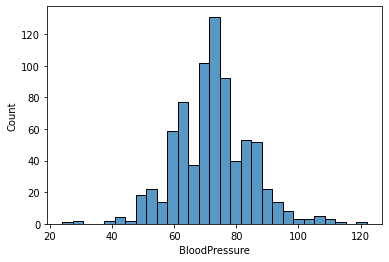

In [22]:
#Verificando os valores de gravidez
sns.histplot(x = data['BloodPressure'], data=data)

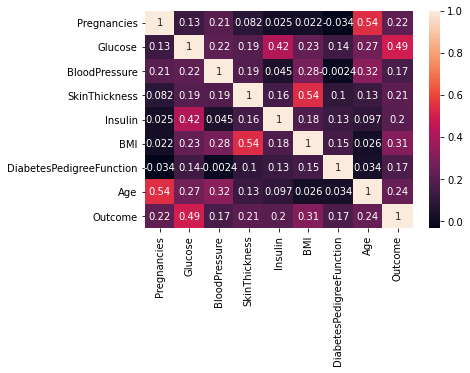

In [23]:
corr = data.corr()
sns.heatmap(corr, data=data, annot=True)

Verificamos que as variáveis BMI e Skinthickness possuem alta correlação, assim como Insulin e Glucose. Faremos
mais testes para verificar a influência dessa situação.

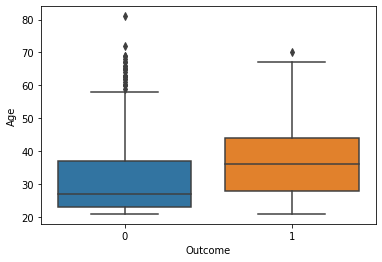

In [24]:
#Verificando a relação da idade com a variável target
sns.boxplot(x = 'Outcome', y = 'Age', data = data)

Verificamos uma média maior de idade naqueles pacientes com diabetes

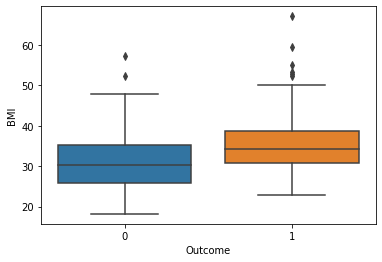

In [25]:
#Verificando a relação da variável BMI com a variável target
sns.boxplot(x = 'Outcome', y = 'BMI', data = data)

In [26]:
#Agora vamos separar as variáveis target das demais
X = data.drop('Outcome', axis=True)
Y = data['Outcome']

In [27]:
# Aplica a divisão com proporção 80/20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.20, random_state = 121)

In [28]:
# Padronização
# A variável target não requer padronização

# Cria o padronizador
scaler = StandardScaler()

# Treina e aplica nos dados de treino
X_treino_scaled = scaler.fit_transform(X_treino.values)

# Apenas aplica nos dados de teste
X_teste_scaled = scaler.transform(X_teste.values)

## Seleção de Variáveis: Recursive Feature Selection com Validação Cruzada (RFECV)

In [29]:
# Cria o seletor de variáveis

# Cria o estimador
estimador_rfc = RandomForestClassifier(random_state = 121)

# Cria o seletor
seletor_f1 = RFECV(estimator = estimador_rfc, step = 1, cv = StratifiedKFold(10), scoring = 'f1')

# Treinamos o seletor
seletor_f1 = seletor_f1.fit(X_treino_scaled, y_treino)

In [30]:
print('Número Ideal de Atributos: {}'.format(seletor_f1.n_features_))

Número Ideal de Atributos: 8


In [31]:
# Vamos avaliar a acurácia do modelo com F1 Score
previsoes_seletor_f1 = seletor_f1.predict(X_teste_scaled)
from sklearn.metrics import accuracy_score
acc_seletor_f1 = accuracy_score(y_teste, previsoes_seletor_f1)
acc_seletor_f1

0.8246753246753247

In [32]:
# Relatório de Classificação
print(classification_report(y_teste, previsoes_seletor_f1))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       100
           1       0.80      0.67      0.73        54

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



In [33]:
# Cria um dataframe com os resultados
resultado_seletor_f1 = pd.DataFrame()
resultado_seletor_f1['Atributo'] = X_treino.columns[np.where(seletor_f1.support_ == True)]
resultado_seletor_f1['Score'] = seletor_f1.estimator_.feature_importances_
resultado_seletor_f1.sort_values('Score', inplace = True, ascending = True)

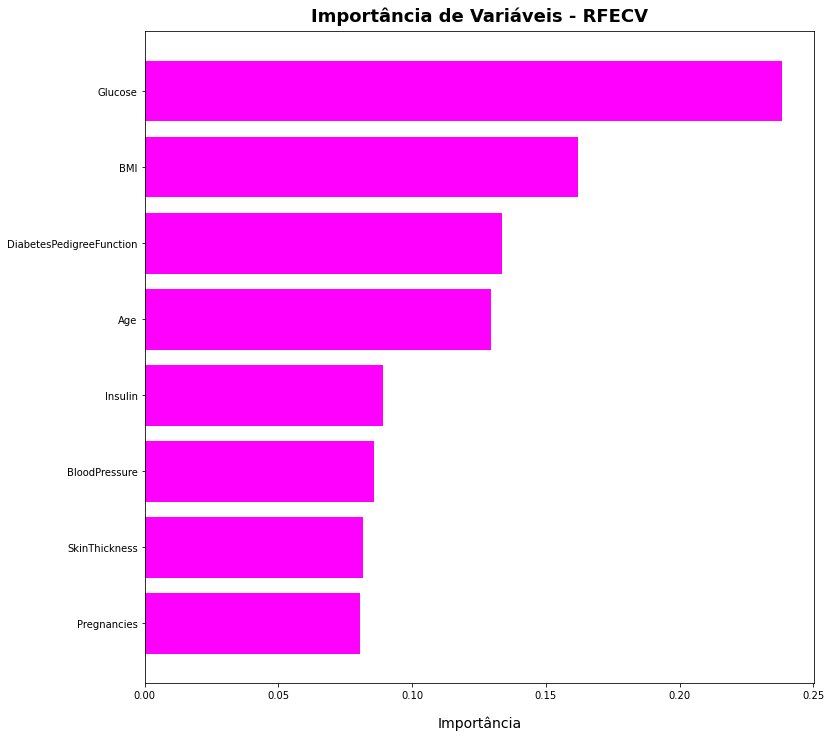

In [34]:
# Plot 
plt.figure(figsize = (12, 12))
plt.barh(y = resultado_seletor_f1['Atributo'], width = resultado_seletor_f1['Score'], color = 'Magenta')
plt.title('Importância de Variáveis - RFECV', fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel('Importância', fontsize = 14, labelpad = 15)
plt.show()

In [35]:
# Extrai as variáveis e quais são importante ou não para o modelo
variaveis_rfecv = pd.Series(seletor_f1.support_, index = X_treino.columns)
variaveis_rfecv

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
dtype: bool

Pela técnica do RFECV a variável Glucose apresentou a maior importância, seguida de BMI e a Função.

In [36]:
# Criando a primeira versão modelo de Regressão Logística com StatsModels

# Cria o objeto
logit_obj_v1 = sm.Logit(y_treino, X_treino_scaled)

# Cria o modelo
logit_modelo_v1 = logit_obj_v1.fit()

# Print do resultado
print(logit_modelo_v1.summary())

Optimization terminated successfully.
         Current function value: 0.542156
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Fri, 25 Dec 2020   Pseudo R-squ.:                  0.1614
Time:                        19:33:38   Log-Likelihood:                -332.88
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 1.510e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3696      0.117      3.161      0.002       0.140       0.599
x2             0.9988      0.

In [37]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_treino_scaled, y_treino)

## Modelo 1 - Baseline- Regressão Logística

In [38]:
lr = LogisticRegression(random_state=121).fit( X_res, y_res)
resultado_lr = lr.predict(X_teste_scaled)
print(classification_report(y_teste, resultado_lr))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       100
           1       0.80      0.74      0.77        54

    accuracy                           0.84       154
   macro avg       0.83      0.82      0.83       154
weighted avg       0.84      0.84      0.84       154



## Modelo 2 - KNN


Matriz de Confusão:



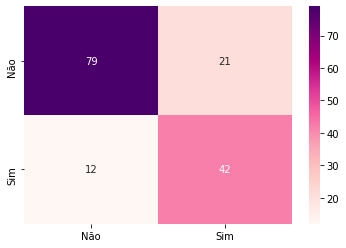


Relatório de Classificação:

               precision    recall  f1-score   support

           0       0.87      0.79      0.83       100
           1       0.67      0.78      0.72        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.80      0.79      0.79       154



In [39]:
# Cria o modelo
modelo_knn = KNeighborsClassifier()

# Treina o modelo com dados de entrada padronizados
modelo_knn.fit(X_res, y_res)

# Previsões com o modeloo treinado
resultado_knn = modelo_knn.predict(X_teste_scaled)

# Matriz de confusão
print("\nMatriz de Confusão:\n")
conf_mat = confusion_matrix(y_teste, resultado_knn)
tags = ["Não", "Sim"]
sns.heatmap(conf_mat, annot = True, xticklabels = tags, yticklabels = tags, cmap = "RdPu")
plt.show()


# Relatório de classificação
report_knn = classification_report(y_teste, resultado_knn)
print("\nRelatório de Classificação:\n\n", report_knn)

## Modelo 3 - Random Forest

In [40]:
clf = RandomForestClassifier(max_depth=10,
                             n_estimators=500,
                             criterion='entropy', 
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=121)
modelo_clf= clf.fit(X_res, y_res)

In [41]:
resultado_clf= clf.predict(X_teste_scaled)

In [42]:
print(classification_report(y_teste, resultado_clf))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       100
           1       0.80      0.83      0.82        54

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154




Matriz de Confusão:



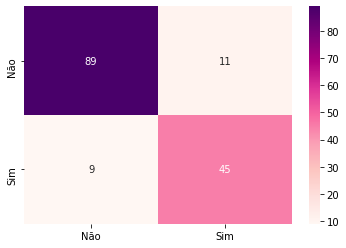

In [43]:
# Matriz de confusão
print("\nMatriz de Confusão:\n")
conf_mat = confusion_matrix(y_teste, resultado_clf)
tags = ["Não", "Sim"]
sns.heatmap(conf_mat, annot = True, xticklabels = tags, yticklabels = tags, cmap = "RdPu")
plt.show()

In [44]:
# Score AUC
print(roc_auc_score(y_teste, resultado_clf))

0.8616666666666668


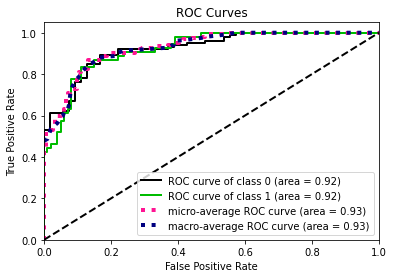

In [45]:
# Calcula a Curva ROC para cada classe
y_probs_v1 = clf.predict_proba(X_teste_scaled)
skplt.metrics.plot_roc(y_teste, y_probs_v1)
plt.show()

## Modelo 4 -  XGboost

In [46]:
#Criação e treino do modelo

modelo_xg = xgb.XGBClassifier(learning_rate = 0.1, 
                              max_depth = 5, 
                              n_estimators = 500,
                             min_child_weight = 5,
                             gamma = 0.1)
modelo_xg.fit(X_res,y_res)

XGBClassifier(gamma=0.1, max_depth=5, min_child_weight=5, n_estimators=500)

In [47]:
resultado_xg = modelo_xg.predict(X_teste_scaled)

In [48]:
print(classification_report(y_teste, resultado_xg))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       100
           1       0.84      0.70      0.77        54

    accuracy                           0.85       154
   macro avg       0.85      0.82      0.83       154
weighted avg       0.85      0.85      0.85       154



## Modelo 5 - Random Forest - Modificado

In [49]:
clf = RandomForestClassifier(max_depth=10,
                             n_estimators=500,
                             criterion='entropy', 
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=121)
modelo_clf= clf.fit(X_res, y_res)

In [50]:
resultado_clf= clf.predict(X_teste_scaled)

In [51]:
print(classification_report(y_teste, resultado_clf))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       100
           1       0.80      0.83      0.82        54

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



In [52]:
resultado_clf= clf.predict(X_teste_scaled)

In [53]:
# Métricas Locais
recall_classe0_v4 = recall_score(y_teste, resultado_clf, pos_label = 0)
recall_classe1_v4 = recall_score(y_teste, resultado_clf, pos_label = 1)
precision_classe0_v4 = precision_score(y_teste, resultado_clf, pos_label = 0)
precision_classe1_v4 = precision_score(y_teste, resultado_clf, pos_label = 1)
print("Recall Classe 0 = {}".format(recall_classe0_v4))
print("Recall Classe 1 = {}".format(recall_classe1_v4))
print("Precision Classe 0 = {}".format(precision_classe0_v4))
print("Precision Classe 1 = {}".format(precision_classe1_v4))

# Métricas Globais
cohen_kappa_v4 = cohen_kappa_score(y_teste, resultado_clf)
acc_v4 = clf.score(X_teste_scaled, y_teste)
print("\nCoeficiente Cohen kappa = {}".format(cohen_kappa_v4))
print("Acurácia = {}".format(acc_v4))

# Relatório de classificação
report_v4 = classification_report(y_teste, resultado_clf)
print("\nRelatório de Classificação:\n\n", report_v4)

Recall Classe 0 = 0.89
Recall Classe 1 = 0.8333333333333334
Precision Classe 0 = 0.9081632653061225
Precision Classe 1 = 0.8035714285714286

Coeficiente Cohen kappa = 0.7172236503856042
Acurácia = 0.8701298701298701

Relatório de Classificação:

               precision    recall  f1-score   support

           0       0.91      0.89      0.90       100
           1       0.80      0.83      0.82        54

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



In [54]:
# Interpreta os pesos dos recursos de entrada por nível de importância das variáveis
# Extrai os nomes das colunas
nomes_colunas = list(X_treino.columns)
eli5.show_weights(clf, feature_names = nomes_colunas)

Weight,Feature
0.2421 ± 0.1195,Glucose
0.1682 ± 0.0968,BMI
0.1298 ± 0.0858,Age
0.1101 ± 0.0686,DiabetesPedigreeFunction
0.1007 ± 0.0824,Insulin
0.0863 ± 0.0657,Pregnancies
0.0851 ± 0.0662,SkinThickness
0.0776 ± 0.0581,BloodPressure


Percebe-se que houve uma concordância na importância da variável glucose e da BMI. O problema é de extrema importância e deve ser estudado de forma profunda. Esse é apenas um desenvolvimento inicial.